<a href="https://colab.research.google.com/github/CodeCraftIA/Genetic-Algorithms/blob/main/GA2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ΓΕΝΕΤΙΚΟΙ ΑΛΓΟΡΙΘΜΟΙ

1η άσκηση (9.1)

In [ ]:
import random
import time
from tqdm import tqdm

# Starting parameters
population_size = 100
chromosome_length = 100
mutation_rate = 0.001
crossover_rate = 0.7
max_generations = 1000

Συνάρτηση προσαρμογής (πλήθος των άσσων)

In [ ]:
def f(x):
  return sum(x)

Δειγματοληψία με τροχό ρουλέτας

In [ ]:
def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected = random.choices(population, probabilities)[0]
    return selected

Διαστάυρωση απλού σημείου

In [ ]:
# Crossover: Single Point Crossover
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, chromosome_length - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2
    else:
        return parent1, parent2

Μετάλλαξη ψηφίου

In [ ]:
def mutate(chromosome):
    mutated_chromosome = chromosome[:]
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]
    return mutated_chromosome

Αρχικοποίηση πληθυσμού

In [ ]:
# Initialize population
def initialize_population():
    population = []
    for _ in range(population_size):
        chromosome = [random.randint(0, 1) for _ in range(chromosome_length)]
        population.append(chromosome)
    return population

Ο αλγόριθμος

In [ ]:
# Main Genetic Algorithm
def genetic_algorithm():
    # Timer
    start_time = time.time()

    generations_to_discover_sequence = []
    for _ in tqdm(range(20)):
        population = initialize_population()
        generation = 0

        while True:#generation < max_generations:
            fitness_values = [f(chromosome) for chromosome in population]

            # Check if the sequence of all "1"s is discovered
            if chromosome_length in fitness_values:
                generations_to_discover_sequence.append(generation)
                break

            # Selection
            selected_population = []
            for _ in range(population_size):
                parent1 = roulette_wheel_selection(population, fitness_values)
                parent2 = roulette_wheel_selection(population, fitness_values)
                selected_population.append((parent1, parent2))

            # Crossover
            new_population = []
            for parents in selected_population:
                child1, child2 = crossover(parents[0], parents[1])
                new_population.extend([child1, child2])

            # Mutation
            mutated_population = [mutate(chromosome) for chromosome in new_population]

            # Update population
            population = mutated_population
            generation += 1


    average_generation = sum(generations_to_discover_sequence) / len(generations_to_discover_sequence)
    print(" Average Generation to Discover Sequence of All '1's:", average_generation)

    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")


Δοκιμή με διαστάυρωση 0.7

In [ ]:
genetic_algorithm()

100%|██████████| 20/20 [27:43<00:00, 83.16s/it]

 Average Generation to Discover Sequence of All '1's: 10641.75
Execution Time: 1663.292503118515 seconds


χρόνος: 27 λεπτά  

μέση γενιά: 10642

Δοκιμή με διαστάυρωση 0

In [ ]:
crossover_rate = 0
genetic_algorithm()

Δεν τελειώνει ποτέ ! 3 ώρες χωρίς να προχωρήσει στην 2ή επανάληψη

Δοκιμες με διαφορετικές τιμές διασταύρωσης

In [ ]:
rate=[0.9,0.5,0.25]
for r in rate:
  crossover_rate=r
  genetic_algorithm()

100%|██████████| 20/20 [27:10<00:00, 81.52s/it]


 Average Generation to Discover Sequence of All '1's: 10375.9
Execution Time: 1630.3736357688904 seconds


100%|██████████| 20/20 [1:11:36<00:00, 214.83s/it]


 Average Generation to Discover Sequence of All '1's: 27818.15
Execution Time: 4296.5287919044495 seconds


 75%|███████▌  | 15/20 [5:54:40<1:25:24, 1025.00s/it]

Με πιθανότητα διασταύρωσης 0.9 μειώνεται και ο χρόνος (πολύ λίγο) αλλά και η μέση γενιά απο 10642 σε 10376.

Με πιθανότητα διασταύρωσης 0.5 βλέπουμε τεράστιες διαφορές με σχεδόν τριπλάσιο χρόνο (72 λεπτά) και μέση γενιά 27818.

Με πιθανότητα διασταύρωσης 0.25 ο αλγόριθμος σταμάτησε να λειτουργεί (λόγο αδράνειας ή σύνδεσης) στο 75% των επαναλήψεων (15/20) μέχρι αυτό το σημείο είχε χρόνο είδη 5 ώρες (προσεγγιστικά θα χρειαζόταν περίπου 6.5-7ώρες).

Συμπέρασμα


Αυτο που παρατήρησα είναι η μεγάλη επίδραση που έχει η διαστραύρωση στον αλγόριθμο, είδαμε προηγουμένως πως όσο αυξανόταν η πιθανότητα της διασταύρωσης τόσο μειωνόταν ο χρόνος και η μέση γενιά. Απο την άλλη όσο η πιθανότητα πλησιάζει στο 0 βλέπουμε πως οι χρόνοι γίνονται αποτρεπτικοί. Τελικό μου συμπέρασμα είναι ότι η μετάλλαξη μαζί με διασταύρωση είναι καλύτερη. Η αιτιολογία μου είναι ότι εφόσον τα καλύτερα άτομα διασταυρωνονται μεταξύ τους υπάρχει μεγάλη πιυανότητα τα νέα άτομα που θα προκήψουν να είνια το ίδιο ή και ακόμα καλύτερα.  

2η Άσκηση (9.2)

In [ ]:
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
population_size = 100
chromosome_length = 100
crossover_rate = 0.7
mutation_rate = 0.001
max_generations = 100

In [ ]:
def f(chromosome):
    number = 0
    j=0
    for i in range(len(chromosome) - 1, -1, -1):
      number+=chromosome[i]*2**j
      j+=1
    return number

Οι υπόλοιποι μέθοδοι είναι ίδιοι με πρίν

In [ ]:
def genetic_algorithm():
    # Timer
    start_time = time.time()

    population = initialize_population()

    best_individuals = []
    mean_fitness_values = []

    for generation in tqdm(range(max_generations)):
        fitness_values = [f(chromosome) for chromosome in population]
        best_individual = population[fitness_values.index(max(fitness_values))]

        best_individuals.append(best_individual)
        mean_fitness = sum(fitness_values) / population_size
        #print(mean_fitness)
        mean_fitness_values.append(mean_fitness)

        selected_population = []
        for _ in range(population_size):
            parent1 = roulette_wheel_selection(population, fitness_values)
            parent2 = roulette_wheel_selection(population, fitness_values)
            selected_population.append((parent1, parent2))

        new_population = []
        for parents in selected_population:
            child1, child2 = crossover(parents[0], parents[1])
            new_population.extend([child1, child2])

        mutated_population = [mutate(chromosome) for chromosome in new_population]
        population = mutated_population

    # Plotting
    #formatted_values = []
    #for value in mean_fitness_values:
        #formatted_value = "{:.0f}".format(value)
        #formatted_values.append(formatted_value)
    plt.plot(range(max_generations), mean_fitness_values)
    plt.xlabel('Generation')
    plt.ylabel('Mean Fitness')
    plt.title('Mean Fitness over Generations')
    plt.show()
    '''
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    for i, ax in enumerate(axes.flatten()):
        ax.plot(range(max_generations), [individual[i] for individual in best_individuals])
        #ax.set_xlabel('Generation')
        ax.set_ylabel(f'Gene {i+1}')
        #ax.set_title(f'Gene {i+1} over Generations')
    plt.tight_layout()
    plt.show() '''
    best_fitnesses =  [f(individual) for individual in best_individuals]
    plt.plot(range(max_generations), best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best chromosome based on fitness')
    plt.title('Best chromosome Fitness over Generations')
    plt.show()

    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")


100%|██████████| 100/100 [00:02<00:00, 39.11it/s]


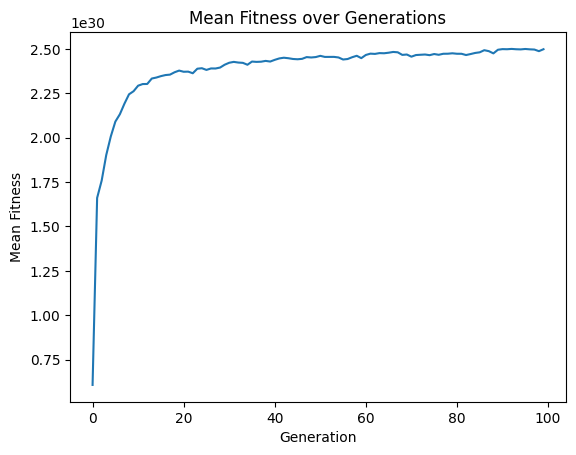

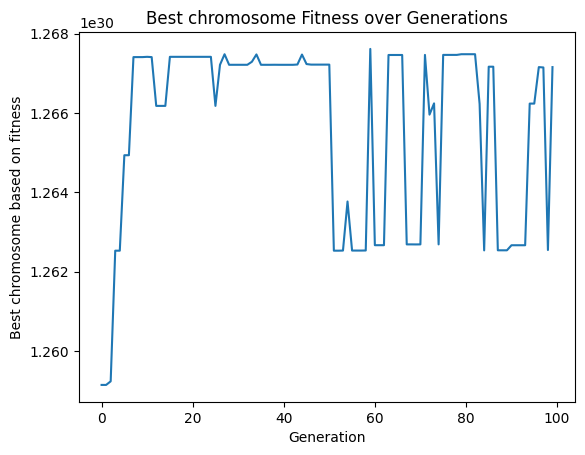

Execution Time: 3.0590169429779053 seconds


In [ ]:
# Run the genetic algorithm
genetic_algorithm()

αυξάνω τον πληθυσμό

100%|██████████| 100/100 [02:29<00:00,  1.50s/it]


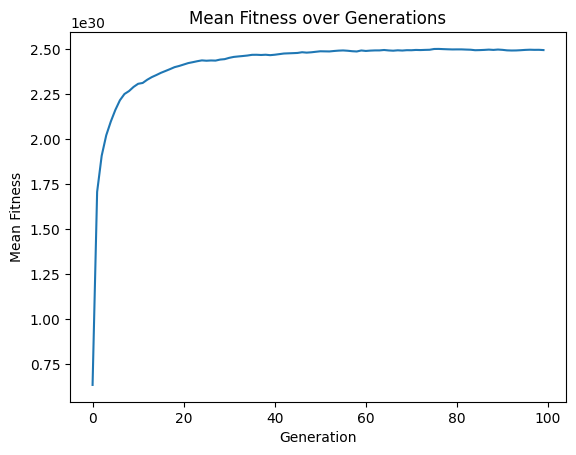

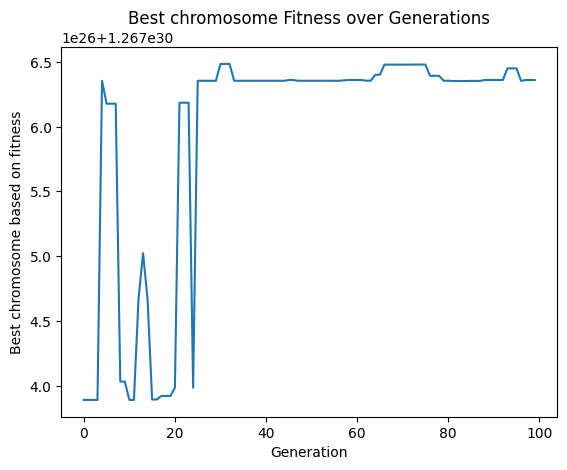

Execution Time: 150.37070631980896 seconds


In [ ]:
population_size = 1000
# Run the genetic algorithm
genetic_algorithm()

Αν συγκρίνουμε το γράφημα της μέσης προσαρμογής αυτού με το προηγούμενο(πληθυσμό 100) παρατηρούμε μία περισσότερο smouth καμπύλη, αυτή των 100 είχε περισσότερες αστάθειες σε σημεία. Τα γραφήματα με τα καλύτερα άτομα δείχνουν ευδιάκριτα το πόσο καλύτερα είναι τα άτομα προς το τέλος των γενεών στον μεγαλύτερο πληθυσμό.

100%|██████████| 100/100 [00:00<00:00, 755.98it/s]


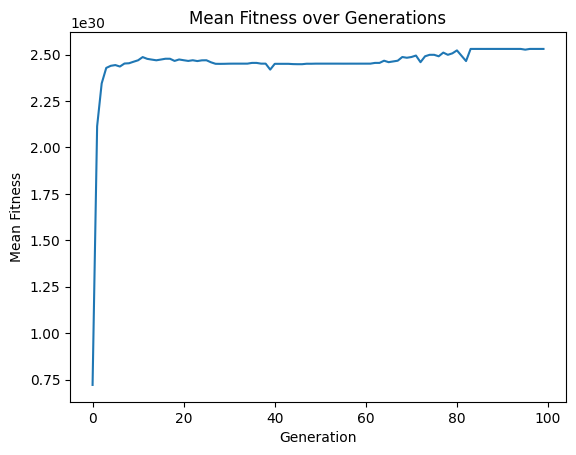

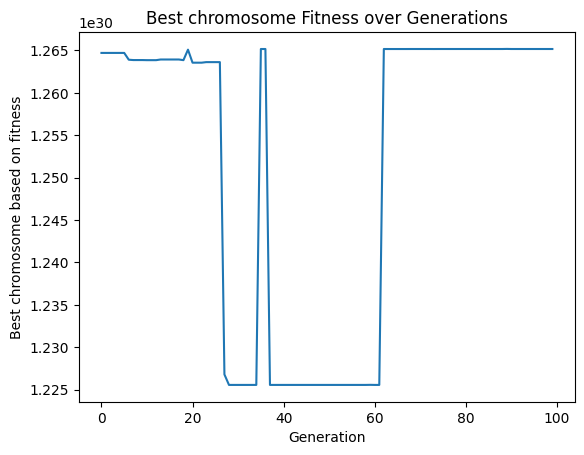

Execution Time: 0.6614460945129395 seconds


In [ ]:
population_size = 10
# Run the genetic algorithm
genetic_algorithm()

Αντίθετα για πολύ λιγότερο πληθυσμό τα αποτελέσματα γίνονται αρκετά χειρότερα. Αφού έχει χαθεί η σταθερότητα βλέπουμε σε μία γενιά χαμηλά αποτελέσματα και στις επόμενες καλά(με βάση τους καλύτερους).

με πιθανότητα διασταύρωσης 0.9

100%|██████████| 100/100 [00:02<00:00, 39.07it/s]


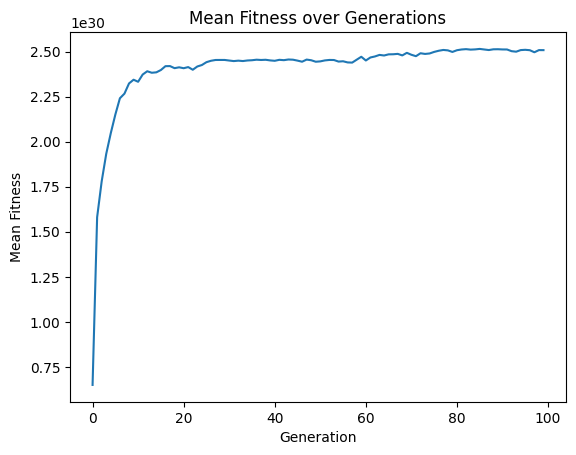

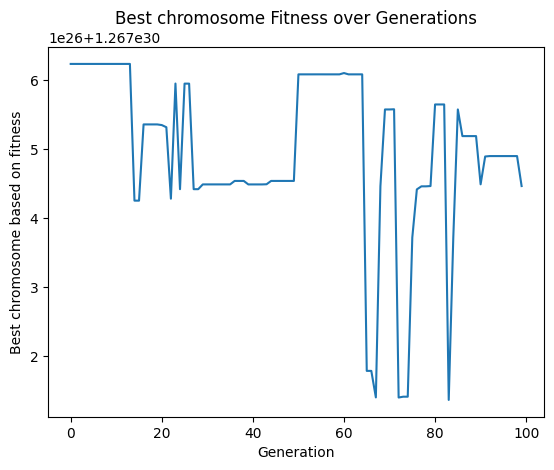

Execution Time: 3.2059357166290283 seconds


In [ ]:
population_size = 100
crossover_rate = 0.9
# Run the genetic algorithm
genetic_algorithm()


100%|██████████| 100/100 [00:03<00:00, 25.29it/s]


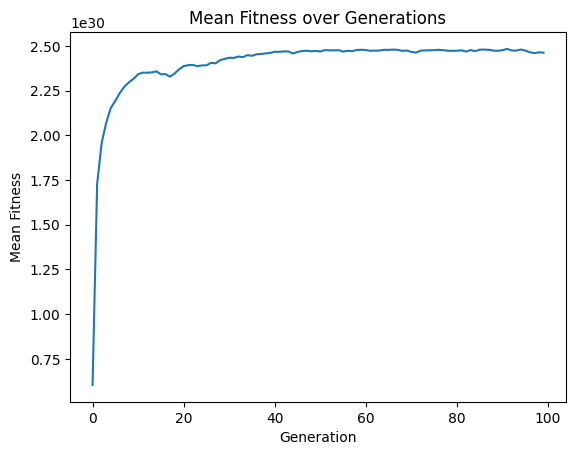

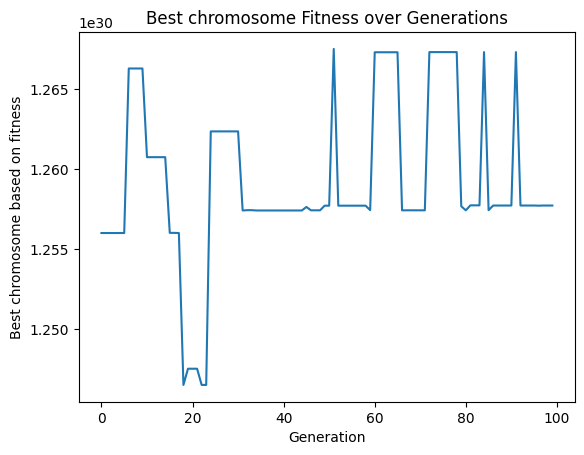

Execution Time: 4.439074516296387 seconds


In [ ]:
crossover_rate = 0.4
# Run the genetic algorithm
genetic_algorithm()


100%|██████████| 100/100 [00:02<00:00, 39.90it/s]


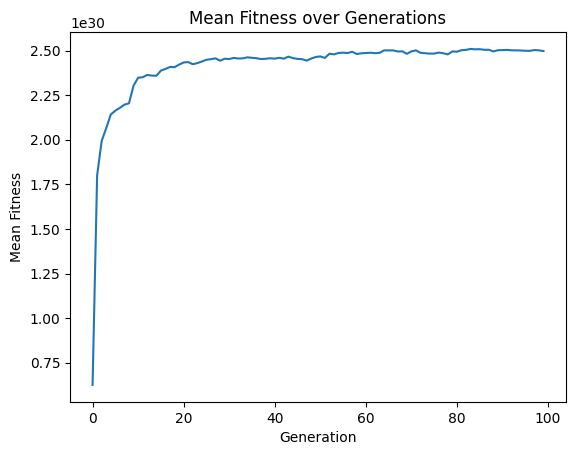

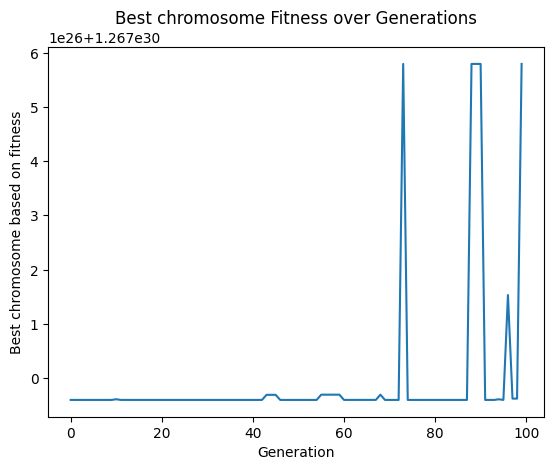

Execution Time: 3.0789194107055664 seconds


In [ ]:
crossover_rate = 0
# Run the genetic algorithm
genetic_algorithm()

Οι διαφορές στα πρώτα γραφημάτα δεν ήταν εμφανής απο crossover_rate 0.7 σε 0.9, στα 0.4 και 0 υπήρχε λίγο περισσότερη αστάθεια. Για διασταύρωση 0 είναι περίεργα τα αποτελέσματα στο δεύτερο γράφημα, όπου ανεβαίνουν πολύ απότομα τα καλύτερα άτομα απο την 70ή γενιά. Πολύ πιθανό να μεταλλάσονται απο 0 σε 1 ωηφία που βρίσκονται πολύ αριστερα με αποτέλεσμα να μεγαλώνει πολύ το fitness.

Πειράματα με την πιυανότητα μετάλλαξης

100%|██████████| 100/100 [00:02<00:00, 38.88it/s]


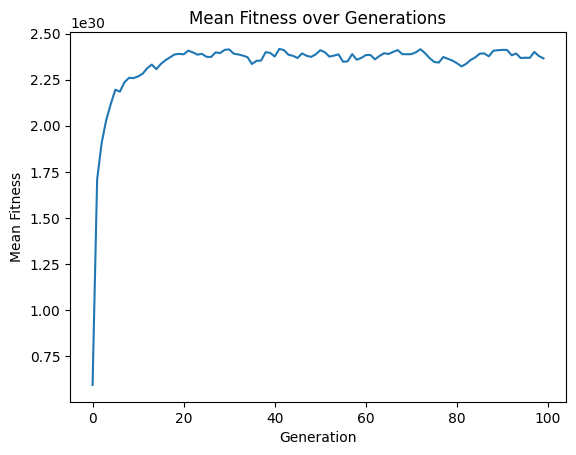

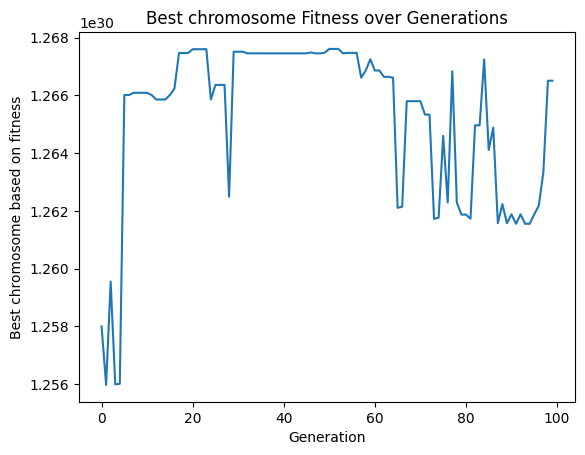

Execution Time: 3.095341920852661 seconds


In [ ]:
crossover_rate = 0.7
mutation_rate = 0.01
genetic_algorithm()

100%|██████████| 100/100 [00:03<00:00, 25.68it/s]


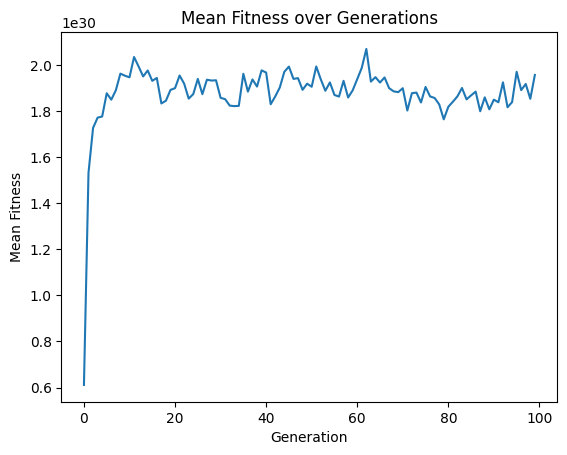

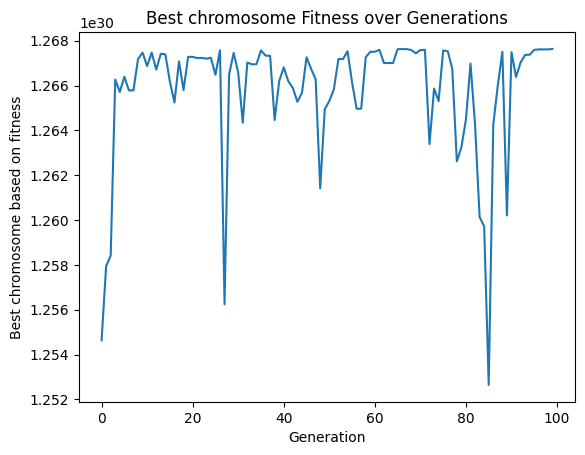

Execution Time: 4.418987989425659 seconds


In [ ]:
mutation_rate = 0.1
genetic_algorithm()

100%|██████████| 100/100 [00:02<00:00, 37.90it/s]


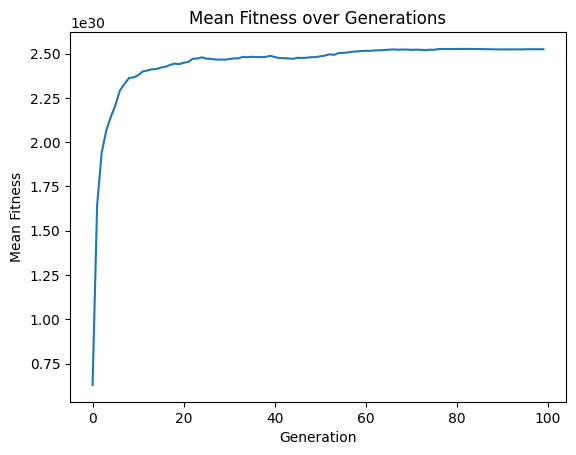

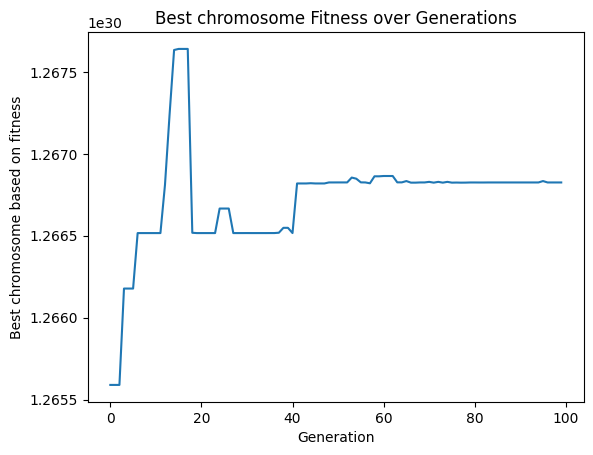

Execution Time: 3.1485755443573 seconds


In [ ]:
mutation_rate = 0
genetic_algorithm()

Στη γενική περίπτωση παρατηρώ πως το μέσο fitness ανα γενιά όσο μεγαλύτερη είναι η πιθανότητα μετάλλαξης τόσο πιο ασταθές γίνεται. Το ίδιο ισχύει και για την αστάθεια στα καλύτερα άτομα ανα γενιά . Μια λογική απάντηση σε αυτό είναι ότι με μεγαλύτερη πιθανότητα μετάλλαξης υπάρχει μεγαλύτερη πιθανότητα να γίνουν είτε χειρότερα είτε καλύτερα τα άτομα απο γενιά σε γενιά, αυτό απαντά στην αστάθεια που εμφανίζεται στα γραφήματα.